In [3]:
from qoalgo.base import QueryGraph
from qoalgo.graphviz import precedence_graph_to_graphviz
from qoalgo.ikkbz import generate_precedence_graph_rooted, is_chain, ikkbz_sub_step, ikkbz_denormalize
from graphviz import Source
from IPython.display import display
import pandas as pd

# IKKBZ verbose
To run this notebook you'll need the `graphviz` and `pandas` package. The CLI version has no external dependencies.

In [6]:
def ikkbz_verbose(pg):
    display(pd.DataFrame.from_dict(pg.get_rank_table_dict()).sort_values(by=['label']))
    display(Source(precedence_graph_to_graphviz(pg)))
    while not is_chain(pg):
        ikkbz_sub_step(pg)
        display(pd.DataFrame.from_dict(pg.get_rank_table_dict()).sort_values(by=['label']))
        display(Source(precedence_graph_to_graphviz(pg)))
    ikkbz_denormalize(pg)
    display(pd.DataFrame.from_dict(pg.get_rank_table_dict()).sort_values(by=['label']))
    display(Source(precedence_graph_to_graphviz(pg)))

## Example exercise 6
This shows the IKKBZ solution from exercise sheet 6

,label,n,s,C,T,rank
0,(R0),20,-1.0,-1.0,-1.0,-1.000000
1,(R1),10,0.1,1.0,1.0,0.000000
2,(R2),50,0.2,10.0,10.0,0.900000
4,(R3),40,0.2,8.0,8.0,0.875000
5,(R4),50,0.3,15.0,15.0,0.933333
3,(R5),55,0.2,11.0,11.0,0.909091
6,(R6),50,0.2,10.0,10.0,0.900000
7,(R7),60,0.2,12.0,12.0,0.916667


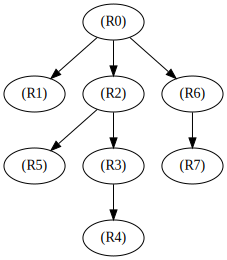

,label,n,s,C,T,rank
0,(R0),20,-1.0,-1.0,-1.0,-1.000000
1,(R1),10,0.1,1.0,1.0,0.000000
2,(R2),50,0.2,10.0,10.0,0.900000
3,(R3),40,0.2,8.0,8.0,0.875000
5,(R4),50,0.3,15.0,15.0,0.933333
4,(R5),55,0.2,11.0,11.0,0.909091
6,(R6),50,0.2,10.0,10.0,0.900000
7,(R7),60,0.2,12.0,12.0,0.916667


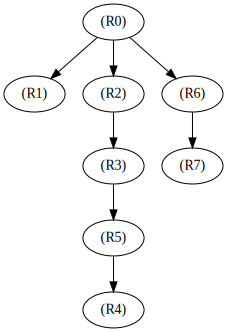

,label,n,s,C,T,rank
0,(R0),20,-1.0,-1.0,-1.0,-1.000000
1,(R1),10,0.1,1.0,1.0,0.000000
2,"(R2,R3)",-1,-1.0,90.0,80.0,0.877778
6,(R4),50,0.3,15.0,15.0,0.933333
4,(R5),55,0.2,11.0,11.0,0.909091
3,(R6),50,0.2,10.0,10.0,0.900000
5,(R7),60,0.2,12.0,12.0,0.916667


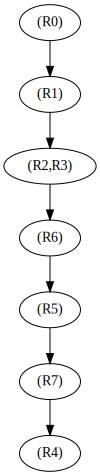

,label,n,s,C,T,rank
0,(R0),20,-1.0,-1.0,-1.0,-1.000000
1,(R1),10,0.1,1.0,1.0,0.000000
2,(R2),-1,-1.0,90.0,80.0,0.877778
3,(R3),-1,-1.0,-1.0,-1.0,-1.000000
7,(R4),50,0.3,15.0,15.0,0.933333
5,(R5),55,0.2,11.0,11.0,0.909091
4,(R6),50,0.2,10.0,10.0,0.900000
6,(R7),60,0.2,12.0,12.0,0.916667


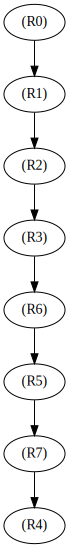

In [7]:
qg = QueryGraph()
# 1. Add relations and their cardinalities
r0 = qg.add_relation('R0', 20)
r1 = qg.add_relation('R1', 10)
r2 = qg.add_relation('R2', 50)
r3 = qg.add_relation('R3', 40)
r4 = qg.add_relation('R4', 50)
r5 = qg.add_relation('R5', 55)
r6 = qg.add_relation('R6', 50)
r7 = qg.add_relation('R7', 60)

# 2. Add the join edges with their selectivities
j01 = qg.add_join(r0, r1, 0.1)
j02 = qg.add_join(r0, r2, 0.2)
j06 = qg.add_join(r0, r6, 0.2)
j67 = qg.add_join(r6, r7, 0.2)
j25 = qg.add_join(r2, r5, 0.2)
j23 = qg.add_join(r2, r3, 0.2)
j34 = qg.add_join(r3, r4, 0.3)

# 3. pick the root of the precedence graph (e.g. r0)
precedence_graph = generate_precedence_graph_rooted(qg, r0)

# 4. run the algorithm
ikkbz_verbose(precedence_graph)